In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf

2023-05-03 18:00:45.234942: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print(tf.__version__)

2.12.0


In [3]:
import os
cwd = os.getcwd()
TRAIN_PATH = f'{cwd}/combined-dataset/training-data'
TEST_PATH = f'{cwd}/combined-dataset/test-data'

terrain_img = PIL.Image.open(f'{TRAIN_PATH}/class_0/0_image_1.png')
plane_img = PIL.Image.open(f'{TRAIN_PATH}/class_1/1_image_3.png')
ship_img = PIL.Image.open(f'{TRAIN_PATH}/class_2/2_image_1.png')

In [4]:
terrain_img

In [5]:
plane_img

In [6]:
ship_img

In [7]:
batch_size = 64
img_height = 20
img_width = 20

In [8]:
train_data, val_data = tf.keras.utils.image_dataset_from_directory(
  TRAIN_PATH,
  validation_split=0.1,
  subset="both",
  color_mode="rgb",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 28800 files belonging to 3 classes.
Using 25920 files for training.
Using 2880 files for validation.


In [9]:
class_names = train_data.class_names
print(class_names)

['class_0', 'class_1', 'class_2']


In [10]:
for image_batch, labels_batch in train_data:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(64, 20, 20, 3)
(64,)


2023-05-03 18:01:02.058899: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [25920]
	 [[{{node Placeholder/_4}}]]
2023-05-03 18:01:02.059335: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [25920]
	 [[{{node Placeholder/_0}}]]


In [11]:
model = tf.keras.Sequential([
  tf.keras.layers.BatchNormalization(input_shape = (20, 20, 3)),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(3, activation="softmax", name="output")  
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 20, 20, 3)        12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 18, 18, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 9, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                        

In [13]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy', 'mse'])

In [14]:
test_data = tf.keras.utils.image_dataset_from_directory(
  TEST_PATH,
  label_mode="int",
  color_mode="rgb",
  image_size=(img_height, img_width))

Found 7200 files belonging to 3 classes.


In [15]:
test_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 20, 20, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [16]:
model.evaluate(test_data, verbose=2)

2023-05-03 18:01:15.794455: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [7200]
	 [[{{node Placeholder/_0}}]]
2023-05-03 18:01:15.794905: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [7200]
	 [[{{node Placeholder/_4}}]]


225/225 - 1s - loss: 54.7618 - accuracy: 0.2222 - mse: 0.4815 - 941ms/epoch - 4ms/step


[54.761837005615234, 0.2222222238779068, 0.4814651906490326]

In [17]:
history = model.fit(
  train_data,
  validation_data=val_data,
  epochs=10
)

Epoch 1/10
402/405 [============================>.] - ETA: 0s - loss: 0.2390 - accuracy: 0.9104 - mse: 0.4270

2023-05-03 18:01:25.925694: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2880]
	 [[{{node Placeholder/_4}}]]
2023-05-03 18:01:25.925882: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2880]
	 [[{{node Placeholder/_4}}]]


405/405 [==============================] - 7s 16ms/step - loss: 0.2383 - accuracy: 0.9105 - mse: 0.4272 - val_loss: 0.1410 - val_accuracy: 0.9476 - val_mse: 0.4664
Epoch 2/10
405/405 [==============================] - 6s 16ms/step - loss: 0.1216 - accuracy: 0.9547 - mse: 0.4546 - val_loss: 0.1313 - val_accuracy: 0.9493 - val_mse: 0.4705
Epoch 3/10
405/405 [==============================] - 7s 16ms/step - loss: 0.0925 - accuracy: 0.9657 - mse: 0.4608 - val_loss: 0.0830 - val_accuracy: 0.9670 - val_mse: 0.4786
Epoch 4/10
405/405 [==============================] - 7s 16ms/step - loss: 0.0743 - accuracy: 0.9725 - mse: 0.4644 - val_loss: 0.0711 - val_accuracy: 0.9740 - val_mse: 0.4812
Epoch 5/10
405/405 [==============================] - 7s 16ms/step - loss: 0.0623 - accuracy: 0.9775 - mse: 0.4669 - val_loss: 0.0710 - val_accuracy: 0.9736 - val_mse: 0.4823
Epoch 6/10
405/405 [==============================] - 7s 16ms/step - loss: 0.0505 - accuracy: 0.9818 - mse: 0.4690 - val_loss: 0.0605 - 

In [18]:
test_history = model.evaluate(test_data, verbose=2)

225/225 - 1s - loss: 0.0810 - accuracy: 0.9786 - mse: 0.4751 - 688ms/epoch - 3ms/step


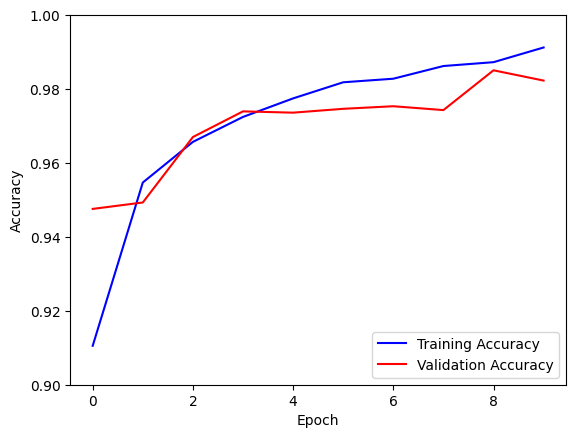

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],c="blue", label='Training Accuracy')
plt.plot(history.history['val_accuracy'], c="red", label ='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

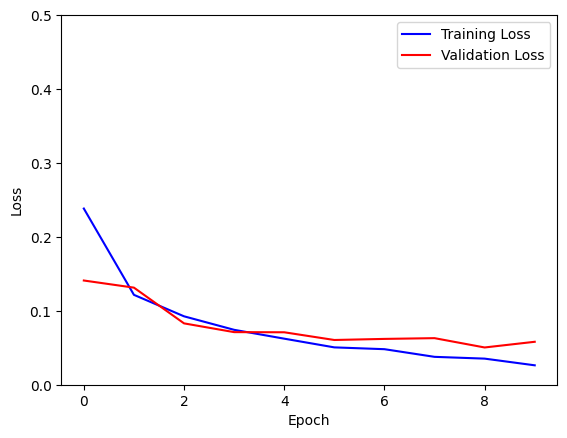

In [26]:
plt.plot(history.history['loss'], color="blue", label='Training Loss')
plt.plot(history.history['val_loss'], color="red", label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 0.5])
plt.legend(loc='upper right')

In [29]:
import numpy as np

prediction = model.predict(np.array([np.array(terrain_img)]))
prediction.argmax()

1/1 [==============================] - 0s 25ms/step


0

In [31]:
model.save("./model")

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets
